# 911 Emergencies

A US-county would like to know what are the main cases they need to focus on to protect their citizens. They hired you to get that kind of recommandations. In addition they give you a map with all the 911 calls they received over the past years.

1. Import common libraries (including plotly)

In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "svg" # to be replaced by "iframe" if working on JULIE
from sklearn.datasets import load_digits

2. Import the dataset here 👉👉 <a href="https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+non+Supervis%C3%A9/DBSCAN/Datasets/911.csv" target="_blank">911.csv</a>

In [3]:
data = pd.read_csv("https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+non+Supervis%C3%A9/DBSCAN/Datasets/911.csv")
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


3. The dataset is quite big, take a sample of 10 000 observations

In [4]:
data_sample = data.sample(10000)
data_sample.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
154405,40.139579,-75.112462,EVANS AVE & N YORK RD; UPPER MORELAND; 2017-01...,19090.0,Traffic: VEHICLE ACCIDENT -,2017-01-11 14:49:33,UPPER MORELAND,EVANS AVE & N YORK RD,1
24535,39.993930,-75.284888,WYNNEWOOD RD & KNOX RD; LOWER MERION; Station...,19096.0,EMS: NAUSEA/VOMITING,2016-02-10 10:17:36,LOWER MERION,WYNNEWOOD RD & KNOX RD,1
415549,40.118983,-75.415897,MONROE BLVD & MADISON AVE; LOWER PROVIDENCE; ...,19403.0,EMS: NAUSEA/VOMITING,2018-10-31 09:48:09,LOWER PROVIDENCE,MONROE BLVD & MADISON AVE,1
532148,40.103377,-75.412450,VALLEY FORGE CIR & OLD VALLEY FORGE RD; UPPER...,19406.0,EMS: FALL VICTIM,2019-08-09 12:51:59,UPPER MERION,VALLEY FORGE CIR & OLD VALLEY FORGE RD,1
611519,40.133037,-75.408463,SHANNONDELL DR & SHANNONDELL BLVD; LOWER PROV...,19403.0,EMS: MEDICAL ALERT ALARM,2020-02-21 23:32:50,LOWER PROVIDENCE,SHANNONDELL DR & SHANNONDELL BLVD,1


5. Using plotly scatter mapbox, visualize your data points on a map. You should also differentiate colors depending on `title`

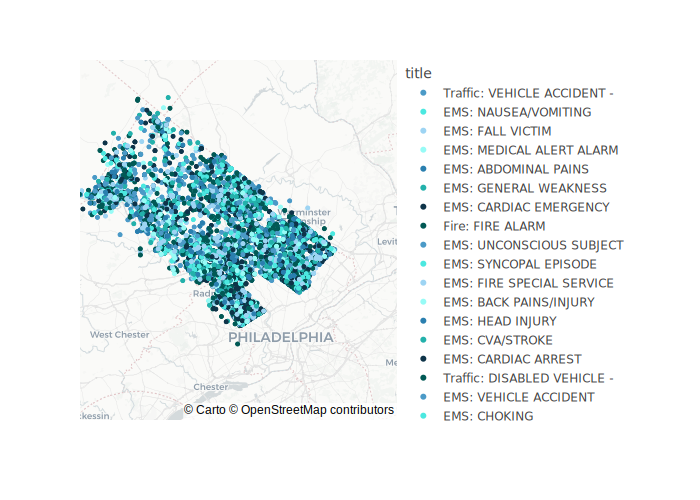

In [5]:
fig = px.scatter_mapbox(
        data_sample,
        lat="lat",
        lon="lng",
        color="title",
        mapbox_style="carto-positron"
)

fig.show()

6. The dataset is quite big, let's try to use DBSCAN to help us out. First, create a variable `X` that only includes `lat`, `lng` and `title` columns.

In [6]:
data_sample = data_sample.loc[:, ["lat", "lng", "title"]]
data_sample.head()

,lat,lng,title
154405,40.139579,-75.112462,Traffic: VEHICLE ACCIDENT -
24535,39.993930,-75.284888,EMS: NAUSEA/VOMITING
415549,40.118983,-75.415897,EMS: NAUSEA/VOMITING
532148,40.103377,-75.412450,EMS: FALL VICTIM
611519,40.133037,-75.408463,EMS: MEDICAL ALERT ALARM


7. Create dummy variables column `title`.

In [7]:
numeric_features = [0, 1] # Positions des colonnes quantitatives dans X
numeric_transformer = StandardScaler()

# Création du transformer pour les variables catégorielles
categorical_features = [2] # Positions des colonnes catégorielles dans X
categorical_transformer = OneHotEncoder(drop='first')

# On combine les transformers dans un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocessings sur le dataset
print("Preprocessing sur le train set...")
print(data_sample.head())
X = preprocessor.fit_transform(data_sample) # fit_transform !!
print('...Terminé.')
print(X[0:5, :])
print()

Preprocessing sur le train set...
              lat        lng                        title
154405  40.139579 -75.112462  Traffic: VEHICLE ACCIDENT -
24535   39.993930 -75.284888         EMS: NAUSEA/VOMITING
415549  40.118983 -75.415897         EMS: NAUSEA/VOMITING
532148  40.103377 -75.412450             EMS: FALL VICTIM
611519  40.133037 -75.408463     EMS: MEDICAL ALERT ALARM
...Terminé.
  (0, 0)	-0.06338697038789332
  (0, 1)	0.06884460223664261
  (0, 89)	1.0
  (1, 0)	-0.5692595439021875
  (1, 1)	-0.00204675188062879
  (1, 36)	1.0
  (2, 0)	-0.13492192742749837
  (2, 1)	-0.05590998347284804
  (2, 36)	1.0
  (3, 0)	-0.1891261699805729
  (3, 1)	-0.0544927377445266
  (3, 22)	1.0
  (4, 0)	-0.08610882981530149
  (4, 1)	-0.05285359897000379
  (4, 35)	1.0



8. Let's start using DBSCAN, import the module and fit DBSCAN to your data. You should use `eps=0.2`, `min_samples=100` and `metric="manhattan"` as parameters

In [8]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=100, metric="manhattan")

db.fit(X)

DBSCAN(eps=0.2, metric='manhattan', min_samples=100)

9. Find out how many clusters DBSCAN created.

In [9]:
np.unique(db.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9])

10. Add a new column `"cluster"` to `data_sample` where each observations are going to be the label of the corresponding cluster.

In [10]:
data_sample["cluster"] = db.labels_
data_sample.head()

,lat,lng,title,cluster
154405,40.139579,-75.112462,Traffic: VEHICLE ACCIDENT -,0
24535,39.993930,-75.284888,EMS: NAUSEA/VOMITING,-1
415549,40.118983,-75.415897,EMS: NAUSEA/VOMITING,-1
532148,40.103377,-75.412450,EMS: FALL VICTIM,1
611519,40.133037,-75.408463,EMS: MEDICAL ALERT ALARM,-1


11. Visualize all the clusters on a map except all the ones that DBSCAN considered as outliers.

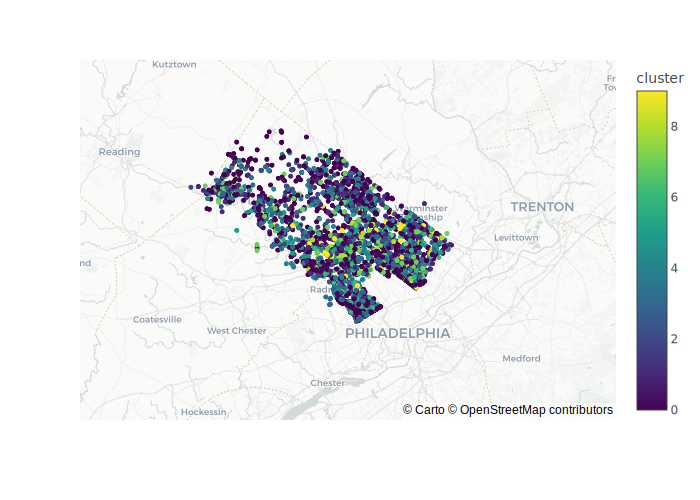

In [11]:
fig = px.scatter_mapbox(
        data_sample[data_sample.cluster != -1],
        lat="lat",
        lon="lng",
        color="cluster",
        mapbox_style="carto-positron"
)

fig.show()

12. Visualize all data points on a map except outliers using plotly. You should have different colors per `title`.

13. What would then be your recommandations for this US county politicians?

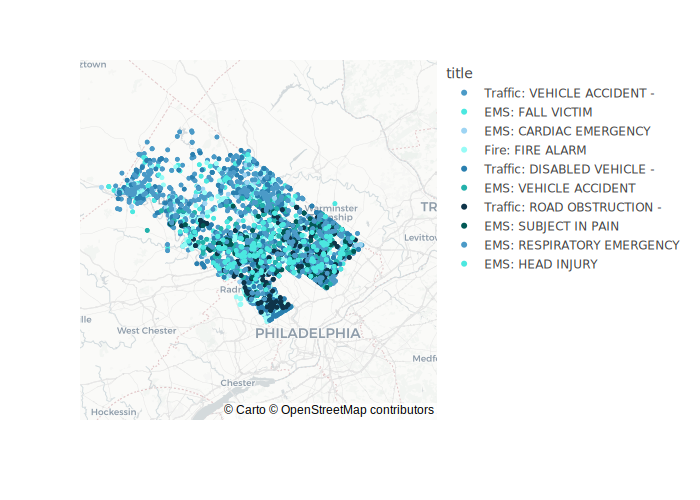

In [12]:
px.scatter_mapbox(
    data_sample.loc[data_sample.cluster != -1, :],
    lat="lat",
    lon="lng",
    color="title",
    mapbox_style="carto-positron"
)

**The map shows the main topics to focus on and the main areas where this events occur. Therefore these are the areas that politics should focus on.**